# Exercícios

#### Problemas de Classificação

---

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" style="position: absolute; top: 0px; right: 40px; border-radius: 5px;" />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

sns.set()

## 1. Marketing

Neste primeiro caso, você irá utilizar um dataset de marketing (propagandas/advertising) (que está disponível no <a href="https://www.kaggle.com/fayomi/advertising">Kaggle</a>).

A sua base de dados contém as seguintes colunas:

* 'Daily Time Spent on Site': tempo que o cliente ficou no site (em minutos);
* 'Age': idade do cliente (em anos);
* 'Area Income': média salarial (por ano) da região geográfica do cliente;
* 'Daily Internet Usage': tempo médio (em minutos) que o cliente fica na internet;
* 'Ad Topic Line': título do anúncio;
* 'City': cidade do cliente;
* 'Male': dummy indicando se o cliente é do sexo masculino (1) ou não (0);
* 'Country': país do cliente;
* 'Timestamp': marcação de tempo em que o cliente clickou no anúncio OU fechou a página
* 'Clicked on Ad': dummy indicando se o cliente clickou no anúncio (1) ou não (0).

Seu objetivo é criar um modelo que possa prever se um determinado usuário clicará em um anúncio online ou não, com base em suas características pessoais/comportamentais, bem como informações relativas ao anúncio.

Suas variáveis independentes (preditores/features) podem ser as primeiras 9 colunas, enquanto sua variável dependente (resposta/target) é a última coluna ("Clicked on Ad").

Ou seja, seu modelo deve ser capaz de dizer se um usuário com um conjunto particular das 9 features vai clicar no anúncio ou não.

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/50f53645-6236-4e71-b9b1-5ba0372e16a7.csv) para fazer o download do dataset.

In [3]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/50f53645-6236-4e71-b9b1-5ba0372e16a7.csv')

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [12]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [5]:
df['Clicked on Ad'].unique()

array([0, 1])

In [6]:
df['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

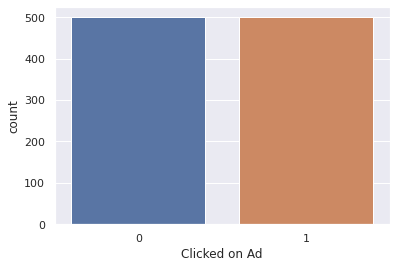

In [7]:
sns.countplot(x=df['Clicked on Ad'])

#### Analisando colunas categóricas

In [9]:
df.select_dtypes(include=['object']).head()

,Ad Topic Line,City,Country,Timestamp
0,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,2016-03-27 00:53:11
1,Monitored national standardization,West Jodi,Nauru,2016-04-04 01:39:02
2,Organic bottom-line service-desk,Davidton,San Marino,2016-03-13 20:35:42
3,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,2016-01-10 02:31:19
4,Robust logistical utilization,South Manuel,Iceland,2016-06-03 03:36:18


In [10]:
df['Ad Topic Line'].nunique()

1000

In [13]:
df['City'].nunique()

969

In [14]:
df['Country'].nunique()

237

### Obtendo os dados de entrada e saída

In [16]:
X = df.select_dtypes(exclude=['object']).drop(columns=['Clicked on Ad'])
y = df['Clicked on Ad']

In [17]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Análise de modelos com Validação Cruzada

In [23]:
cross_validate(estimator=LogisticRegression(), X=X_train, y=y_train,\
               scoring=['precision', 'recall', 'roc_auc'], return_train_score=True)

{'fit_time': array([0.02584124, 0.01853776, 0.03038669, 0.01799893, 0.01171231]),
 'score_time': array([0.00887203, 0.006953  , 0.00688314, 0.00500464, 0.00593019]),
 'test_precision': array([0.95238095, 0.9       , 0.94285714, 0.87671233, 0.95522388]),
 'train_precision': array([0.92142857, 0.93065693, 0.91605839, 0.93772894, 0.91941392]),
 'test_recall': array([0.82191781, 0.8630137 , 0.91666667, 0.88888889, 0.88888889]),
 'train_recall': array([0.89273356, 0.88235294, 0.86551724, 0.88275862, 0.86551724]),
 'test_roc_auc': array([0.92782662, 0.96237988, 0.97303922, 0.92463235, 0.97916667]),
 'train_roc_auc': array([0.961261  , 0.95168478, 0.94881226, 0.96228608, 0.94915709])}

In [25]:
cross_validate(estimator=RandomForestClassifier(max_depth=4), X=X_train, y=y_train,\
               scoring=['precision', 'recall', 'roc_auc'], return_train_score=True)

{'fit_time': array([0.18515086, 0.13192129, 0.13503003, 0.13658714, 0.1342988 ]),
 'score_time': array([0.02372813, 0.02800131, 0.02272129, 0.0243504 , 0.02593923]),
 'test_precision': array([0.98529412, 0.94666667, 0.97260274, 0.91780822, 0.98611111]),
 'train_precision': array([0.97909408, 0.99293286, 0.98932384, 0.9862069 , 0.99288256]),
 'test_recall': array([0.91780822, 0.97260274, 0.98611111, 0.93055556, 0.98611111]),
 'train_recall': array([0.97231834, 0.97231834, 0.95862069, 0.9862069 , 0.96206897]),
 'test_roc_auc': array([0.97321611, 0.99366183, 0.99775327, 0.97406046, 0.99938725]),
 'train_roc_auc': array([0.99736973, 0.99481607, 0.99421456, 0.99773946, 0.99404853])}

In [26]:
cross_validate(estimator=AdaBoostClassifier(), X=X_train, y=y_train,\
               scoring=['precision', 'recall', 'roc_auc'], return_train_score=True)

{'fit_time': array([0.11369181, 0.0719533 , 0.07187533, 0.06935263, 0.06948137]),
 'score_time': array([0.02303433, 0.0198307 , 0.01767325, 0.0206852 , 0.01659656]),
 'test_precision': array([0.94117647, 0.93333333, 0.97297297, 0.90540541, 0.97183099]),
 'train_precision': array([0.99649123, 0.99647887, 0.9964539 , 0.99653979, 0.99298246]),
 'test_recall': array([0.87671233, 0.95890411, 1.        , 0.93055556, 0.95833333]),
 'train_recall': array([0.98269896, 0.97923875, 0.96896552, 0.99310345, 0.97586207]),
 'test_roc_auc': array([0.95072582, 0.98691474, 0.99857026, 0.96037582, 0.99040033]),
 'train_roc_auc': array([0.99985955, 0.99968079, 0.99936143, 0.99996169, 0.999106  ])}

### Criando uma pipeline

In [28]:
X.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male'],
      dtype='object')

In [32]:
ct = ColumnTransformer([
    ('scaler', StandardScaler(),\
         ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'])
])

In [34]:
pipe = Pipeline([
    ('preprocessing', ct),
    ('model', LogisticRegression(solver='liblinear'))
])

In [35]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Daily Time Spent on Site',
                                                   'Age', 'Area Income',
                                                   'Daily Internet Usage'])])),
                ('model', LogisticRegression(solver='liblinear'))])

In [36]:
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:,1]

In [37]:
confusion_matrix(y_test, y_pred)

array([[160,   2],
       [  3, 135]])

In [38]:
def classification_compare_models(X, y, models):
    scores = {}
    
    for name, model in models.items():
        pipe = Pipeline([
            ('scaler', MinMaxScaler()),
            ('model', model)
        ])
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
        
        pipe.fit(X_train, y_train)

        y_pred = pipe.predict(X_test)
        y_proba = pipe.predict_proba(X_test)[:,1]

        precision0,\
        recall0,\
        precision1,\
        recall1,\
        roc_auc = precision_score(y_test, y_pred, pos_label=0),\
                    recall_score(y_test, y_pred, pos_label=0),\
                    precision_score(y_test, y_pred),\
                    recall_score(y_test, y_pred),\
                    roc_auc_score(y_test, y_proba)
        
        scores.setdefault(name, [precision0, recall0, precision1, recall1, roc_auc])
        
    return pd.DataFrame(scores, index=['precision0', 'recall0', 'precision1', 'recall1', 'roc_auc'])

In [40]:
classification_compare_models(X, y,\
                              models={
                                'LogisticRegression': LogisticRegression(solver='liblinear'),
                                'RandomForest': RandomForestClassifier(max_depth=4),
                                'AdaBoost': AdaBoostClassifier(),
                              })

,LogisticRegression,RandomForest,AdaBoost
precision0,0.963636,0.987179,0.974843
recall0,0.981481,0.950617,0.956790
precision1,0.977778,0.944444,0.950355
recall1,0.956522,0.985507,0.971014
roc_auc,0.997585,0.996064,0.984031


In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 10),
    'min_samples_split': np.arange(4, 30, 2)
}

rscv = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=params, scoring='roc_auc',\
                            random_state=2, cv=5)

In [56]:
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])},
                   random_state=2, scoring='roc_auc')

In [57]:
rscv.best_score_

0.988147121964713

In [58]:
rscv.best_params_

{'min_samples_split': 6, 'max_depth': 8, 'criterion': 'entropy'}

## 2. Empréstimo

Para este projeto, estaremos explorando dados disponíveis publicamente de LendingClub.com. Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que têm dinheiro (investidores). Felizmente, como investidor, você gostaria de investir em pessoas que mostraram um perfil de ter uma alta probabilidade de pagá-lo de volta. Vamos tentar criar um modelo que ajude a prever isso.

O clube de empréstimo teve um ano muito interessante em 2016, então vamos verificar alguns de seus dados e ter em mente o contexto. Esses dados são de antes mesmo de serem públicos. Utilizaremos os dados de empréstimos de 2007-2010 e tentaremos classificar e prever se o mutuário pagou o empréstimo na íntegra.

Aqui estão o que as colunas representam:
* credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito da LendingClub.com e 0 caso contrário.
* purpose: O objetivo do empréstimo (leva valores "credit_card", "debt_consolidation", "educacional", "grande compra", "small_business" e "all_other").
* int.rate: a taxa de juros do empréstimo (uma taxa de 11% seria armazenada como 0,11). Os mutuários julgados por LendingClub.com para serem mais arriscados recebem taxas de juros mais elevadas.
* installment: as parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
* log.annual.inc: O log natural da renda anual auto-relatada do mutuário.
* dti: Ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual).
* fico: a pontuação de crédito FICO do mutuário.
* days.with.cr.line: O número de dias em que o mutuário teve uma linha de crédito.
* revol.bal: Saldo rotativo do mutuário (montante não pago no final do ciclo de cobrança do cartão de crédito).
* revol.util: taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).
* inq.last.6mths: número de consultas do mutuário por credores nos últimos 6 meses.
* delinq.2yrs: o número de vezes que o mutuário havia passado mais de 30 dias em um pagamento nos últimos 2 anos.
* pub.rec: O número de registros públicos depreciativos do mutuário (arquivamentos de falências, ônus fiscais ou julgamentos).
* `not.fully.paid`: Se o cliente pagou o empréstimo na íntegra. Nossa variável resposta.

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/5e9ae1dc-5f52-4ba4-a997-a1c1614d5e05.csv) para fazer o download do dataset.

In [2]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/5e9ae1dc-5f52-4ba4-a997-a1c1614d5e05.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

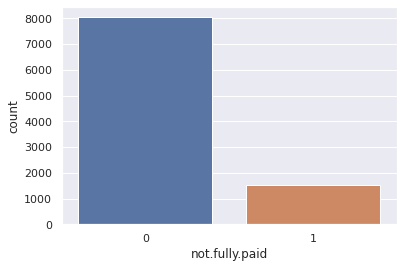

In [7]:
sns.countplot(x=df['not.fully.paid'])

In [9]:
df['fully.paid'] = df['not.fully.paid'].replace({ 0: 1, 1: 0 })

In [10]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1


In [12]:
df.drop(columns=['not.fully.paid'], inplace=True)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1


<AxesSubplot:xlabel='fully.paid', ylabel='count'>

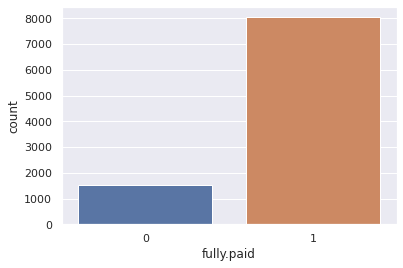

In [13]:
sns.countplot(x=df['fully.paid'])

In [20]:
df['fully.paid'].value_counts(True)

1    0.839946
0    0.160054
Name: fully.paid, dtype: float64

#### Criando um modelo apenas os dados numéricos

In [15]:
X = df.drop(columns=['fully.paid', 'purpose'])
y = df['fully.paid']

In [16]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [19]:
cross_validate(estimator=LogisticRegression(solver='liblinear'), X=X_train, y=y_train, scoring='roc_auc', return_train_score=True)

{'fit_time': array([0.03771949, 0.04911208, 0.08004737, 0.10379124, 0.04703546]),
 'score_time': array([0.00390983, 0.00669146, 0.00484586, 0.00353122, 0.00355148]),
 'test_score': array([0.68166665, 0.61832376, 0.62722541, 0.64029906, 0.64585581]),
 'train_score': array([0.63952415, 0.65162226, 0.65219815, 0.64855392, 0.63673399])}

#### Considerando os dados categóricos

In [78]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [79]:
X = df_dummies.drop(columns=['fully.paid'])
y = df_dummies['fully.paid']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [81]:
cross_validate(estimator=LogisticRegression(solver='liblinear'), X=X_train, y=y_train, scoring='roc_auc', return_train_score=True)

{'fit_time': array([0.04757643, 0.05241036, 0.05716348, 0.09286404, 0.03966808]),
 'score_time': array([0.00312471, 0.00422692, 0.00453401, 0.0063417 , 0.00466657]),
 'test_score': array([0.6871315 , 0.62430088, 0.63052584, 0.64991532, 0.65092296]),
 'train_score': array([0.65015601, 0.65720295, 0.65622761, 0.65765829, 0.64376976])}

### Desbalanceamento de Amostras

In [82]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [83]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [84]:
y.value_counts()

1    8045
0    1533
Name: fully.paid, dtype: int64

#### RandomUnderSampling

In [85]:
X_under, y_under = RandomUnderSampler().fit_resample(X, y)

In [86]:
y_under.value_counts()

0    1533
1    1533
Name: fully.paid, dtype: int64

<AxesSubplot:xlabel='fully.paid', ylabel='count'>

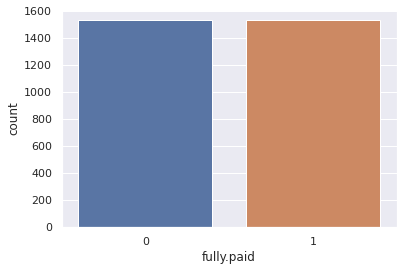

In [87]:
sns.countplot(x=y_under)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=10)

In [89]:
cross_validate(estimator=LogisticRegression(solver='liblinear'), X=X_train, y=y_train, scoring='roc_auc', return_train_score=True)

{'fit_time': array([0.0193119 , 0.01644707, 0.01717114, 0.01504779, 0.04693627]),
 'score_time': array([0.0036521 , 0.00303841, 0.0032692 , 0.00313902, 0.00346589]),
 'test_score': array([0.66863547, 0.59878717, 0.62845592, 0.65682055, 0.61934881]),
 'train_score': array([0.63610269, 0.6509159 , 0.64660099, 0.63609325, 0.63984776])}

#### NearMiss

In [90]:
X_nm, y_nm = NearMiss().fit_resample(X, y)

In [91]:
y_nm.value_counts()

0    1533
1    1533
Name: fully.paid, dtype: int64

<AxesSubplot:xlabel='fully.paid', ylabel='count'>

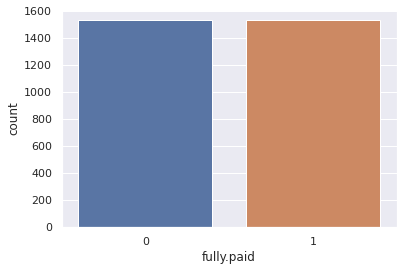

In [92]:
sns.countplot(x=y_nm)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.3, random_state=10)

In [94]:
cross_validate(estimator=LogisticRegression(solver='liblinear'), X=X_train, y=y_train, scoring='roc_auc', return_train_score=True)

{'fit_time': array([0.01331115, 0.0165813 , 0.01930356, 0.01681089, 0.02246547]),
 'score_time': array([0.0032599 , 0.0032351 , 0.00435925, 0.00527287, 0.0048871 ]),
 'test_score': array([0.83431773, 0.84941749, 0.83854982, 0.78666754, 0.839767  ]),
 'train_score': array([0.83039499, 0.82871991, 0.83190182, 0.84308801, 0.83016907])}

In [95]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [96]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [97]:
confusion_matrix(y_test, y_pred)

array([[319, 149],
       [ 71, 381]])

In [98]:
roc_auc_score(y_test, y_proba)

0.8327707813327283

---

## <font color=red>Atenção!</font>

Ao analisar os resultados acima, notamos que houve uma melhoria bastante considerável nas métricas de avaliação do nosso modelo. No entanto, é importante entendermos o porquê da melhoria dessas métricas. **Ao aplicar uma técnica de balanceamento de amostras que envolve geração de amostras sintéticas** (`NearMiss` e `SMOTE`, por exemplo) **sobre o conjunto de dados completo** (treino, validação e teste) **temos um grande problema**.

Os dados do treino, validação e teste representam todo o conjunto de dados, uma vez que foram obtidos a partir de combinações de subpopulações de dados; portanto, os dados de teste podem ser muito "parecidos" com os dados de treino. Ou seja, estamos adicionando um viés ao nosso modelo, que nos fará concluir, erroneamente, que temos resultados melhores.

#### Como resolver esse problema?

O problema do desbalanceamento de amostras estará sempre no processo de treino. Sendo assim, sempre realize o balanceamento das amostras apenas nos dados de treino. Dessa forma, seu modelo irá "aprender" com amostras mais equilibradas de cada classe. Em seguida, utilize os **dados originais** para testar o seu modelo.

---

In [48]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


#### Criando uma pipeline com o `imblearn`

In [49]:
from imblearn.pipeline import Pipeline as PipelineImblearn

In [52]:
X = df_dummies.drop(columns=['fully.paid'])
y = df_dummies['fully.paid']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [65]:
def get_pipeline(model=LogisticRegression(solver='liblinear'), sampler=RandomUnderSampler()):
    return PipelineImblearn([
        ('scaler', StandardScaler()),
        ('resampling', sampler), # Balanceamento
        ('model', model)
    ])

In [60]:
# Regressão Logística

pipe_logistic = get_pipeline()

cross_validate(estimator=pipe_logistic, X=X_train, y=y_train, scoring='roc_auc', return_train_score=True)

{'fit_time': array([0.0176115 , 0.03102779, 0.02920485, 0.01585245, 0.03899288]),
 'score_time': array([0.00481248, 0.01039958, 0.00507569, 0.00798965, 0.00803852]),
 'test_score': array([0.67949813, 0.64354992, 0.65516957, 0.67084142, 0.67718829]),
 'train_score': array([0.67242493, 0.67834858, 0.67342709, 0.67571385, 0.67121101])}

In [61]:
# RandomForest

pipe_rf = get_pipeline(model=RandomForestClassifier(max_depth=4))

cross_validate(estimator=pipe_rf, X=X_train, y=y_train, scoring='roc_auc', return_train_score=True)

{'fit_time': array([0.2651763 , 0.2027235 , 0.20224524, 0.48835468, 0.30832005]),
 'score_time': array([0.01851845, 0.02294111, 0.01902461, 0.06382275, 0.02107692]),
 'test_score': array([0.67538913, 0.63164113, 0.63817795, 0.65545458, 0.66617835]),
 'train_score': array([0.69952824, 0.71107278, 0.70713168, 0.70630483, 0.69988785])}

In [62]:
# Regressão Logística (OverSampler)

pipe_logistic = get_pipeline(sampler=RandomOverSampler())

cross_validate(estimator=pipe_logistic, X=X_train, y=y_train, scoring='roc_auc', return_train_score=True)

{'fit_time': array([0.03669524, 0.04765773, 0.07761431, 0.06464887, 0.03743863]),
 'score_time': array([0.00418043, 0.00566626, 0.01589012, 0.00382376, 0.00437808]),
 'test_score': array([0.68271982, 0.65052253, 0.65643769, 0.67982568, 0.68040454]),
 'train_score': array([0.67478371, 0.68342143, 0.68202075, 0.67803347, 0.67355428])}

In [64]:
y_train.value_counts(True)

1    0.839946
0    0.160054
Name: fully.paid, dtype: float64

In [63]:
# RandomForest (OverSampler)

pipe_rf = get_pipeline(model=RandomForestClassifier(max_depth=4), sampler=RandomOverSampler())

cross_validate(estimator=pipe_rf, X=X_train, y=y_train, scoring='roc_auc', return_train_score=True)

{'fit_time': array([0.808285  , 0.97592211, 0.69504046, 0.5974133 , 0.57335973]),
 'score_time': array([0.02646089, 0.02959204, 0.02248406, 0.02241993, 0.02107477]),
 'test_score': array([0.68256433, 0.63379322, 0.64585072, 0.65323227, 0.671951  ]),
 'train_score': array([0.70554643, 0.71620292, 0.7184523 , 0.71283138, 0.71087719])}

---

### Seleção de Features: Método do $\chi^2$

- $H_0$: As variáveis são independentes
- $H_1$: As variáveis são dependentes ✅

> OBS.: Sempre que o p-valor for inferior a 0.05 (considerando uma confiabilidade de 95%), rejeita-se o $H_0$. Em outras palavras, aceita $H_1$ e, por isso, a variável é relevante para o nosso modelo.

In [66]:
from sklearn.feature_selection import chi2

In [69]:
t_stats, p_values = chi2(X, y)

p_values = pd.DataFrame(p_values.reshape(-1, 1), index=X.columns, columns=['p-value'])

In [70]:
p_values.style.format('{:.3f}')

,p-value
credit.policy,0.000
int.rate,0.231
installment,0.000
log.annual.inc,0.543
dti,0.000
fico,0.000
days.with.cr.line,0.000
revol.bal,0.000
revol.util,0.000
inq.last.6mths,0.000


In [71]:
p_values[p_values['p-value'] <= 0.05].index

Index(['credit.policy', 'installment', 'dti', 'fico', 'days.with.cr.line',
       'revol.bal', 'revol.util', 'inq.last.6mths', 'pub.rec',
       'purpose_credit_card', 'purpose_educational', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [72]:
X = df_dummies[['credit.policy', 'installment', 'dti', 'fico', 'days.with.cr.line',
       'revol.bal', 'revol.util', 'inq.last.6mths', 'pub.rec',
       'purpose_credit_card', 'purpose_educational', 'purpose_major_purchase',
       'purpose_small_business']]
y = df_dummies['fully.paid']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [75]:
# RandomForest (OverSampler)

pipe_rf = get_pipeline(model=RandomForestClassifier(max_depth=4), sampler=RandomOverSampler())

cross_validate(estimator=pipe_rf, X=X_train, y=y_train, scoring='roc_auc', return_train_score=True)

{'fit_time': array([0.49848914, 0.45642996, 0.45681381, 0.44628835, 0.44367599]),
 'score_time': array([0.01794839, 0.01965857, 0.01809025, 0.01877213, 0.01846051]),
 'test_score': array([0.67848228, 0.63239291, 0.6356479 , 0.65390351, 0.67354045]),
 'train_score': array([0.70589976, 0.70850738, 0.7059826 , 0.7030259 , 0.70518891])}

> Note que, apesar de eliminarmos 5 colunas, os resultados foram muito semelhantes.

## 3. Risco de Crédito

Neste caso, você irá utilizar um [dataset de risco de crédito](https://www.kaggle.com/uciml/german-credit). O seu objetivo é determinar a quais clientes será concedido crédito, com base em diversas informações que você tem de cada um deles.

1. Age (numérico)
2. Sex (male, female)
3. Job (0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

## 4. Jogadores de Basquete

Imagine que você é um ténico e, por isso, deseja criar um modelo capaz de prever se, de acordo com um conjunto de característica de um jogador, ele vai ser capaz de ter ou não uma carreira de 5 anos ou mais. Para isso, você dispõe de um dataset ([clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/5282bfa7-cbb8-4bf2-9537-6e7c237daf39.csv) para o download) que contém informações passadas de jogadores, bem como a informação como essa informação do seu tempo de carrreira. Cada observação representa um jogador e cada coluna uma característica de desempenho. A coluna `target_5y` define se o jogador teve uma carreira profissional inferior a 5 anos [0], ou se teve uma carreira de 5 anos ou mais [1].

Utilize o conjunto de dados para criar um modelo que seja capaz de prever se um outro jogador ([clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/2d3db466-9a44-4b33-964c-1598457d2a85.csv) para fazer o download dos dados deste jogador), que você está interessado em contratar, vai ter uma carreira igual ou superior a 5 anos. Qual seria a probabilidade disso acontecer?

## 5. Prevendo campanha de investimento no Banco

Você possui dados de campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em ligações telefônicas. Muitas vezes, era necessário mais de um contato para o mesmo cliente, para verificar se o possível cliente aceitaria ('sim') ou não ('não') se inscrever em um programa de depósito bancário a prazo (algo como um investimento em CDB).

O objetivo da classificação é prever se o cliente irá se inscrever (yes/no) nesse investimento (variável `y`).

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/5febb4d1-a2c5-4cc6-b72a-81c72ca67ffe.csv) para fazer o download do dataset.